# Model Interpretability

Author - Rakshita Jaiswal, Nik Bear Brown


**Abstract**
An abstract is:

* What is the question?
* What did you do?
* What were the results?

The primary objective of this assignment is to develop a comprehensive machine learning project encompassing Data Cleaning and Pre-Processing, Feature Selection, Modeling, and Interpretability of the model. The focus is on predicting the survival outcomes of individuals based on characteristics such as Age, Gender, Fare, and the assigned Class (PClass). This project addresses a Classification problem where the survival status is represented by 1, and a non-survival scenario is indicated by 0. Given that the context is inspired by a real-life tragic event, it's important to note that the test and training data used for predicting individual survival is entirely fictional. The prediction tasks on the dataset are carried out using machine learning models. The assignment further asks to explain the models using Shapley Analysis.

Shapley analysis, employed in cooperative game theory, is a mathematical framework designed to distribute the value or payoff of a cooperative game equitably among its participants. The fundamental principle of Shapley analysis is to ensure a just and fair allocation of the overall gains produced through the collaboration among the players.

Shapley analysis provides a rigorous and fair way to distribute the benefits of cooperation among players in a cooperative game. Its foundations in coalition formation and marginal contributions make it a valuable tool in understanding and modeling situations where collaboration and joint decision-making are essential.

**Dataset:**

#### Description of the variables present in the dataset:
* 12 charachteristics of the passengers which were aboard the maiden voyage of the Titanic, including the PassengerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.
* The rich people were given more prefernce to get on the boats, also children, women and the elderly were preferred. Hence we can deduce that the rich old women would have the highest probablity to survive while poor young men would be left to die. The financial status is shown by the PClass.

**Interpret your models.**

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from above steps, interpret the SHAP values and compare them with the other model interpretability methods.

In [ ]:
import pandas as pd
!pip install shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from pathlib import Path
import tensorflow as tf
%matplotlib inline

In [ ]:
# Reading the dataset that is hosted on my personal github
dataset = pd.read_csv('https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/Titanic-Dataset.csv')

In [ ]:
# displaying the first five rows of my dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# displaying information about my dataset, including the number of non-null values and data types of each column, as well as the memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset = dataset.fillna(0, inplace=True)

In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# fetching independent variables that have missing data, and how much
dataset.isnull().sum()/len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
dataset['Age'] = dataset['Age'].fillna(np.mean(dataset['Age']))
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset['Cabin'].fillna(dataset['Cabin'].mode()[0], inplace=True)

In [ ]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# print categorical variables
s = (dataset.dtypes == 'object')
catg_col = list(s[s].index)
print('Categorical : ',catg_col)

Categorical :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# print unique levels for categorical variables
for cat in ['Sex', 'Embarked']:
    print("Levels for catgeory '{0}': {1}".format(cat, dataset[cat].unique()))

Levels for catgeory 'Sex': ['male' 'female']
Levels for catgeory 'Embarked': ['S' 'C' 'Q']


In [ ]:
# preprocessing, mapping values in Sex and Embarked to 0,1 and 0,1,2
dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})
dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
pd.isnull(dataset).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [ ]:
data_features = dataset[["PassengerId", "Pclass", "Age", "Sex", "SibSp", "Parch", "Fare", "Embarked"]]

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
dataset.columns = dataset.columns.str.strip()
X_train, X_validation, Y_train, Y_validation = train_test_split(data_features, dataset["Survived"], test_size=0.25, random_state=1, shuffle=True)
Y_train.describe()

count    668.000000
mean       0.369760
std        0.483101
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
X_train

,PassengerId,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
35,36,1,42.000000,0,1,0,52.0000,0
46,47,3,29.699118,0,1,0,15.5000,2
453,454,1,49.000000,0,1,0,89.1042,1
291,292,1,19.000000,1,1,0,91.0792,1
748,749,1,19.000000,0,1,0,53.1000,0
...,...,...,...,...,...,...,...,...
715,716,3,19.000000,0,0,0,7.6500,0
767,768,3,30.500000,1,0,0,7.7500,2
72,73,2,21.000000,0,0,0,73.5000,0
235,236,3,29.699118,1,0,0,7.5500,0


## Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

0.8050635673523696
[ 7.09402242e-05 -1.87698393e-01 -6.71606882e-03  4.96065496e-01
 -5.42727757e-02  6.72624532e-03  1.49829882e-04  4.81824754e-02]


The provided coefficients are associated with a linear regression model. Each coefficient corresponds to a specific predictor variable in the model, and they indicate the strength and direction of the relationship between each predictor and the response variable. The interpretation of each coefficient is as follows:

Intercept (0.8166350872639214):

The intercept represents the estimated value of the response variable when all predictor variables are zero. In this case, it is 0.8166.

In [ ]:
linearRegression = regressor.predict(X_validation)

In [ ]:
print("Train Score {:.2f}".format(regressor.score(X_train,Y_train)))
print("Test Score {:.2f}".format(regressor.score(X_validation, Y_validation)))

Train Score 0.40
Test Score 0.36


The difference between the training and test scores (0.38 vs. 0.15) indicates a potential issue of overfitting, wherein the model closely tailors itself to the training data but struggles to generalize effectively to new data. Overfitting occurs when a model captures the noise in the training data rather than the fundamental patterns.

To address this, further evaluation and improvement of the model are warranted to enhance its ability to generalize. Potential strategies could involve tweaking the model's complexity, integrating additional features, or applying regularization techniques to mitigate overfitting.

## Fit a linear model and interpret the regression coefficients

In [ ]:
#Statsmodel
model = sm.OLS(
    dataset["Survived"].astype(float),
    data_features.astype(float)
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                              153.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                   1.42e-161
Time:                        23:08:35   Log-Likelihood:                         -448.96
No. Observations:                 891   AIC:                                      913.9
Df Residuals:                     883   BIC:                                      952.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0002   4.99e-05      3.558      0.000    7.96e-05       0.000
Pclass         -0.0048      0.012     -0.392      0.695      -0.029       0.019
Age             0.0014      0.001      1.622      0.105      -0.000       0.003
Sex             0.5698      0.029     19.514      0.000       0.512       0.627
SibSp          -0.0338      0.014     -2.443      0.015      -0.061      -0.007
Parch          -0.0194      0.019     -1.006      0.315      -0.057       0.018
Fare            0.0019      0.000      6.127      0.000       0.001       0.002
Embarked        0.0400      0.022      1.838      0.066      -0.003       0.083
==============================================================================
Omnibus:                       40.712   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.135
Skew:                           0.542   Prob(JB):                     1.58e-10
Kurtosis:                       3.200   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Classification Methods

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

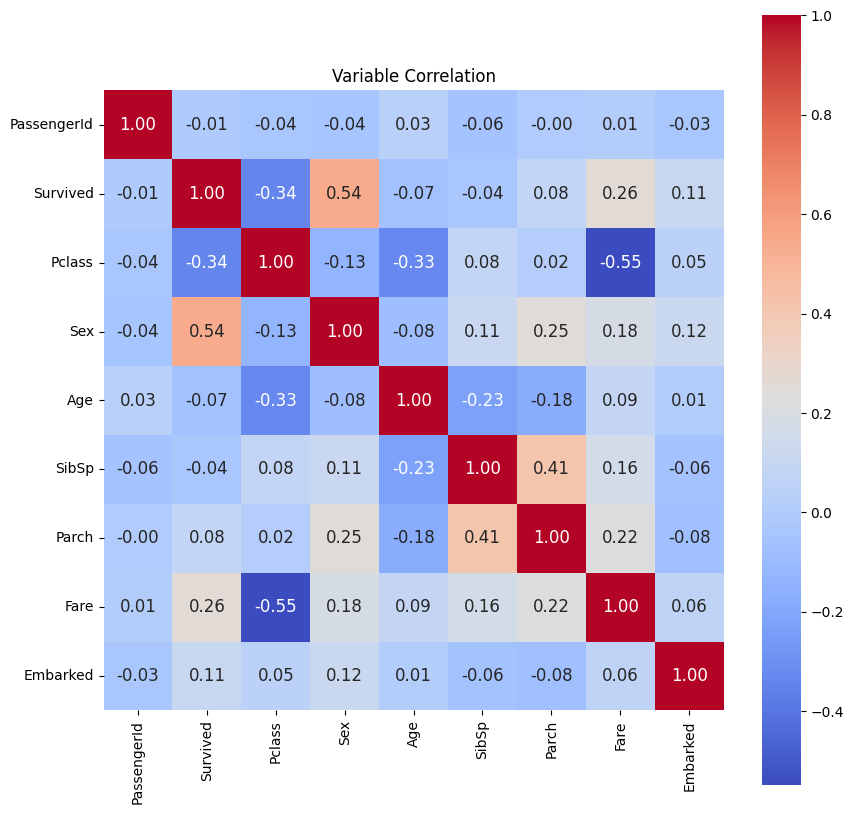

In [ ]:
#Correlation Matrix for the variables
correlation_matrix = dataset.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Variable Correlation')
plt.show()

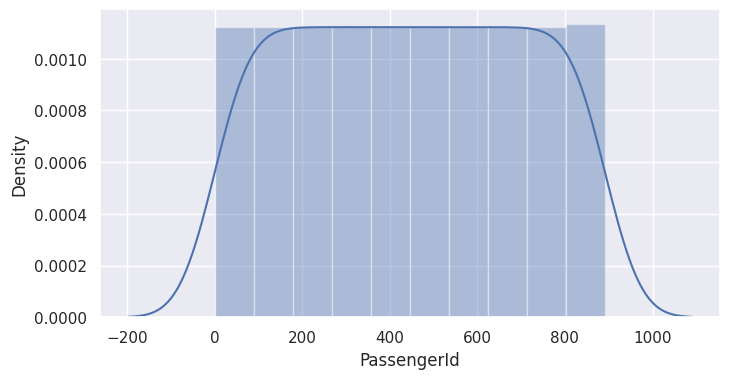

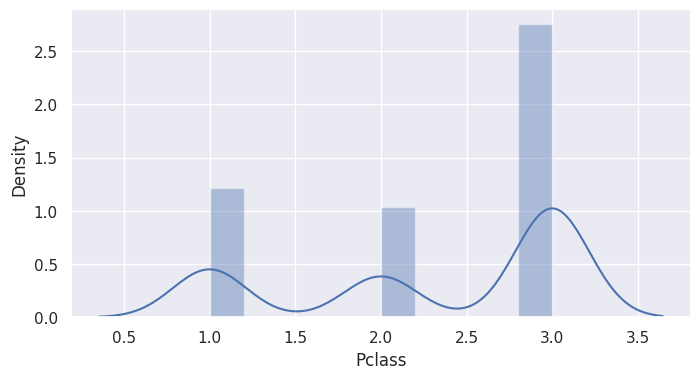

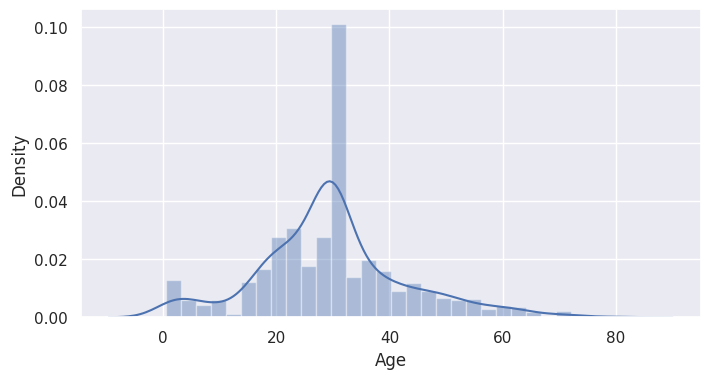

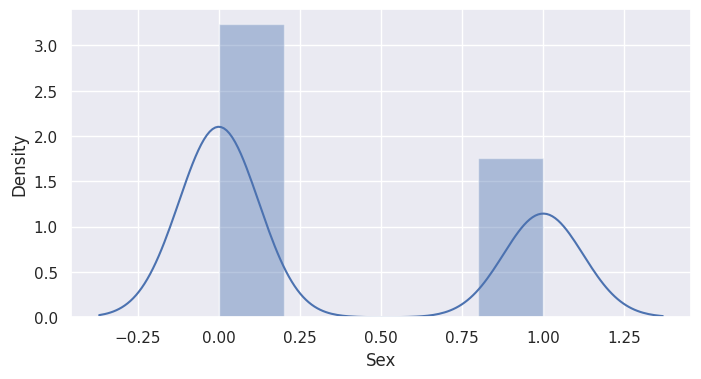

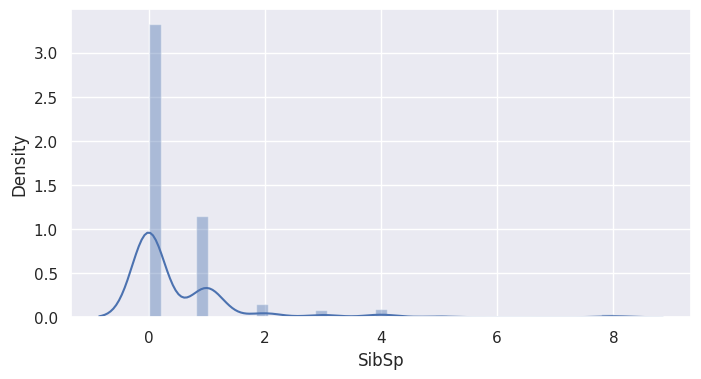

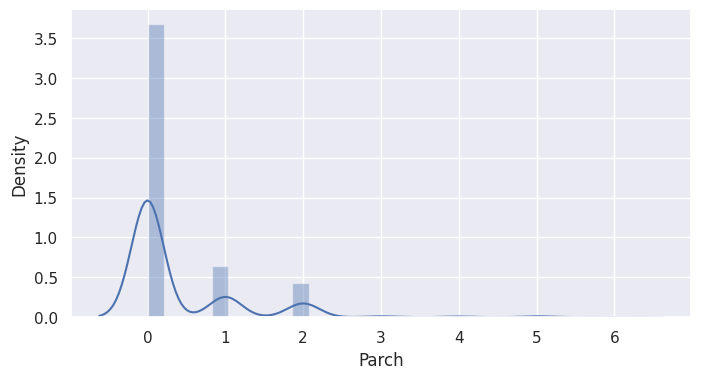

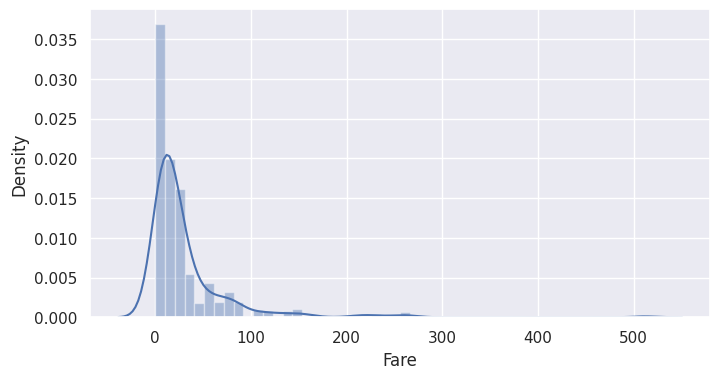

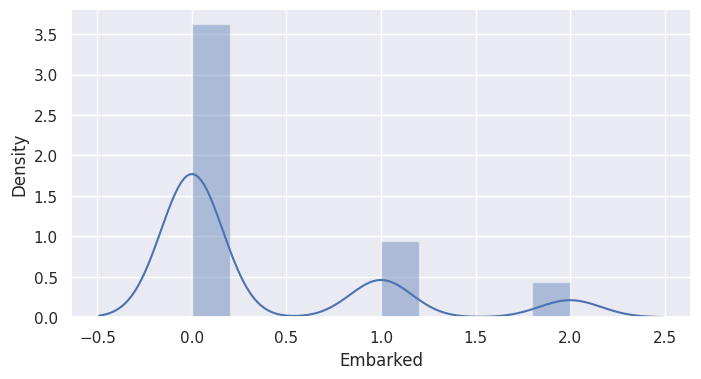

In [ ]:
#These are the histogram and pairplots for the thalach variable which had max correlation
# ax = sns.distplot(dataset['thalach']) # histogram distribution
# sns.pairplot(dataset)

for column in (dataset[["PassengerId", "Pclass", "Age", "Sex","SibSp", "Parch", "Fare", "Embarked"]]):
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(dataset[column])
    plt.show()

<Figure size 2000x700 with 0 Axes>

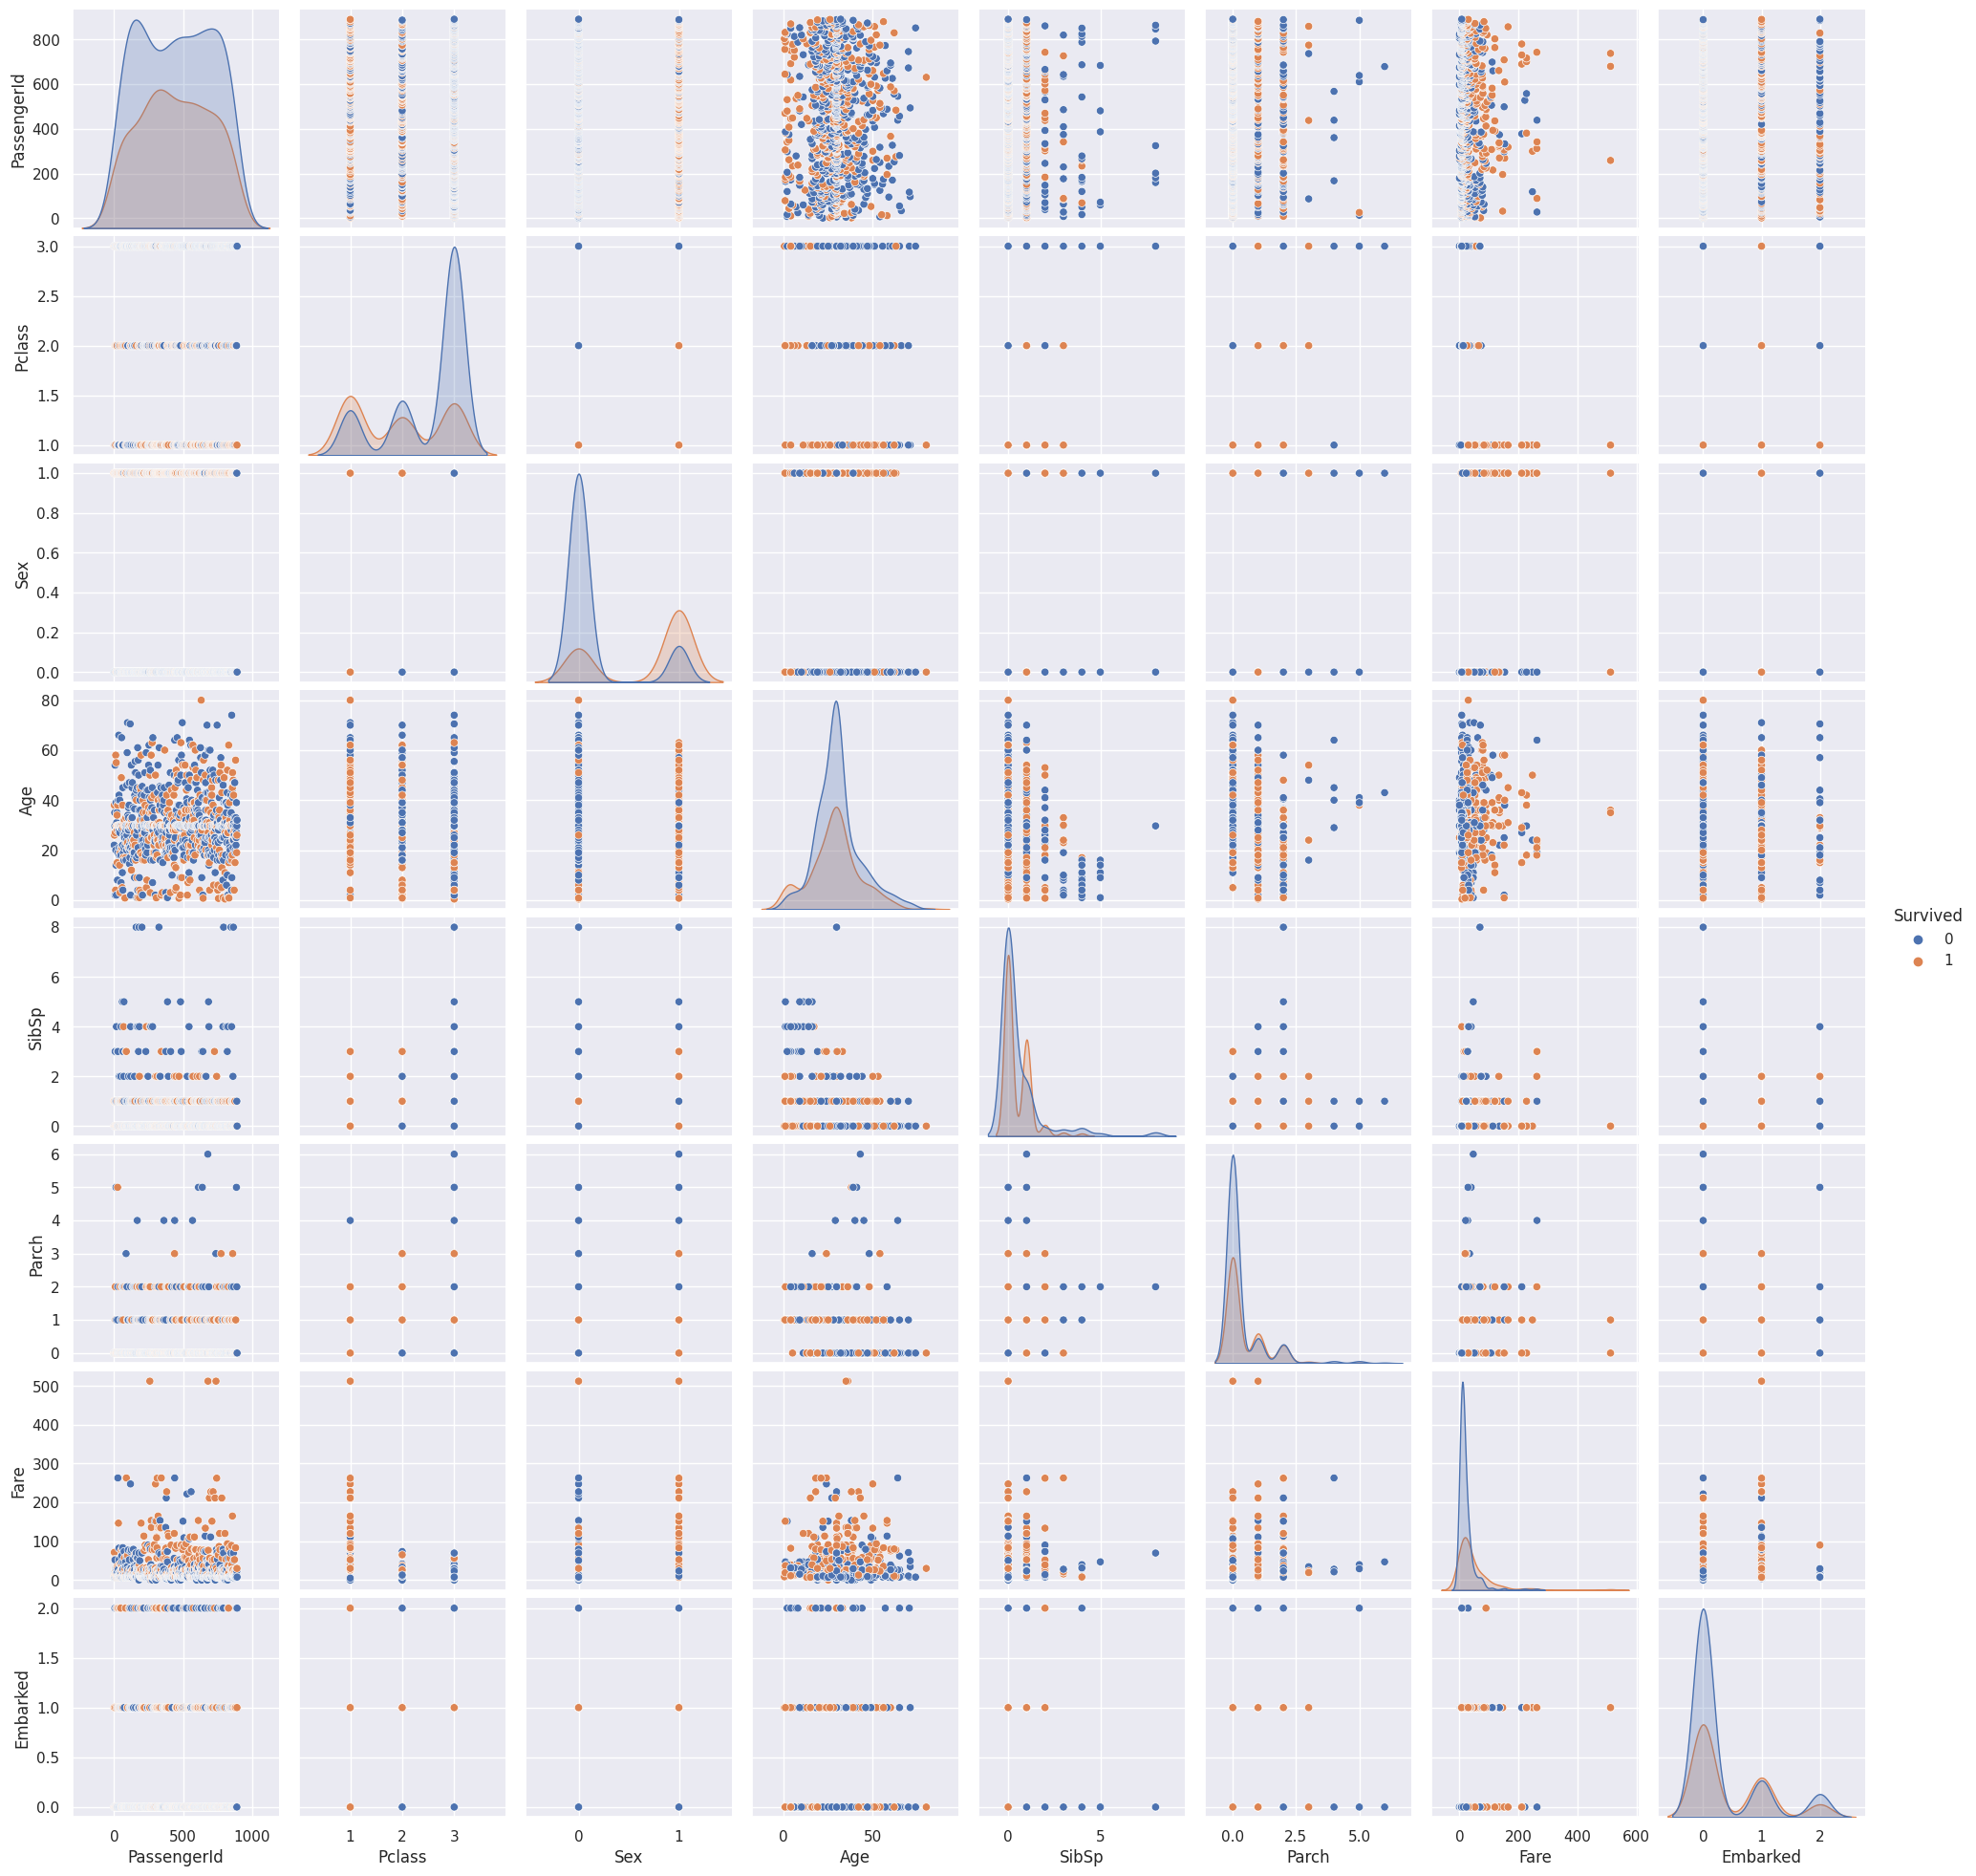

In [ ]:
plt.figure(figsize=(20,7))
sns.pairplot(dataset,hue = 'Survived' )

In [ ]:
# Grouping people by their title and Pclass and assigning the mean of the age of each group to the missing age in each group
# Extracting the title from the name:
Title = []
for name in  dataset.Name:
    Title.append(name.split(",")[1].split(".")[0])

dataset["Title"] = Title
#grouping people with pclass and title
dataset.groupby(["Pclass", 'Title'])['Age'].agg(['mean']).round(0)
# adding the mean of the age of each group to the missing values
dataset["Age"] = dataset.groupby(["Title", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

### Building a Linear Model

In [ ]:
# build a simple logistic regression model and see how the features affect the outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, dataset['Survived'], test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (712, 8) (712,)
shape of X and y respectively (test) : (179, 8) (179,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
Y_pred = model_logistic.predict(X_test)
score = model_logistic.score(X_train, y_train)
print('Training Score:', score)
score = model_logistic.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted who Survived:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Training Score: 0.8019662921348315
Testing Score: 0.8044692737430168
   Predicted
0          0
1          0
2          0
3          1
4          1
% of people predicted who Survived: 0.37988826815642457
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**The model achieves an accuracy score of 79% which is reasonable for our goal.**

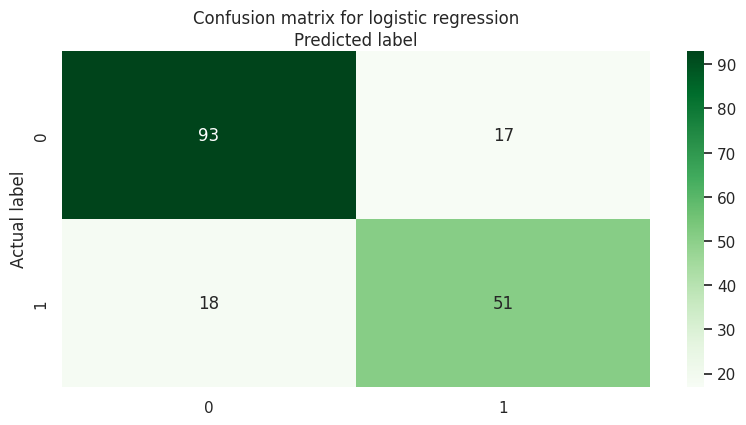

In [ ]:
#Generating Confusion Matrix to interpret mislabels
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Decision Tree Classification
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
score = decision_tree.score(X_train, y_train)
print('Training Score:', score)
score = decision_tree.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Survived yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted who Survived:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 0.8539325842696629
Testing Score: 0.8100558659217877
   Predicted
0          0
1          0
2          1
3          1
4          1
% of people predicted who Survived: 0.329608938547486
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



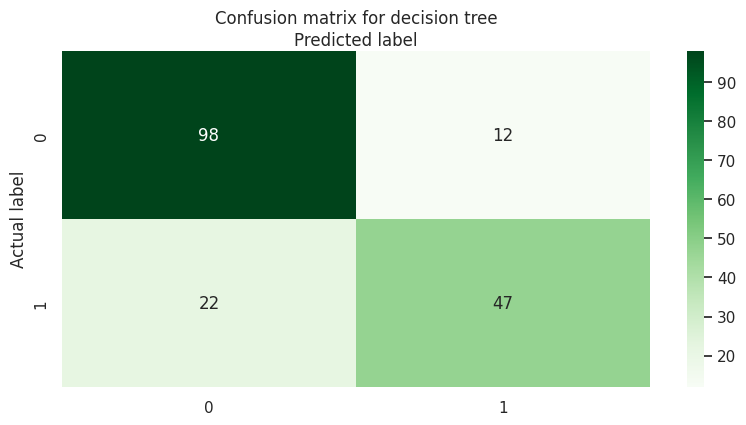

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def evaluate(X, y, reg):
    predictions = reg.predict(X)
    mae = mean_absolute_error(y, predictions)
    return mae

In [ ]:
#Random Forest Classification
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model_randomForest.fit(X_train, y_train)
Y_pred = model_randomForest.predict(X_test)
score = model_randomForest.score(X_train, y_train)
print('Training Score:', score)
score = model_randomForest.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Survived yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted who Survived:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8547486033519553
   Predicted
0          0
1          0
2          0
3          1
4          0
% of people predicted who Survived: 0.31843575418994413
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



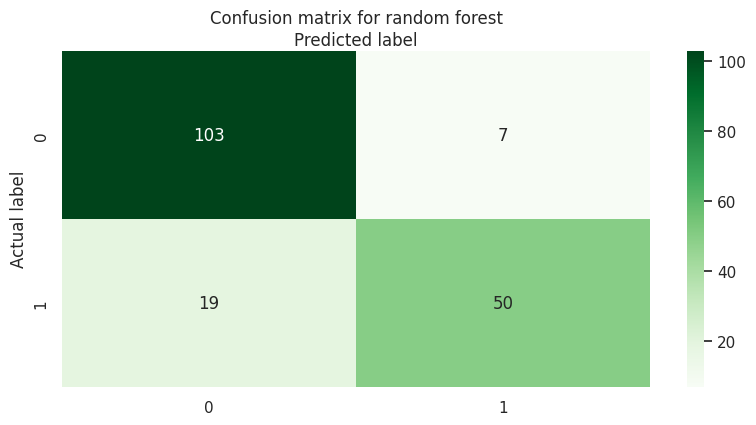

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#KNN Classifier
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
Y_pred = model_knn.predict(X_test)
score = model_knn.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model_knn.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Survived yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted who Survived:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8044692737430168
Testing Score: 0.6368715083798883
   Predicted
0          0
1          0
2          0
3          0
4          0
% of people predicted who Survived: 0.2569832402234637
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       110
           1       0.54      0.36      0.43        69

    accuracy                           0.64       179
   macro avg       0.61      0.59      0.58       179
weighted avg       0.62      0.64      0.62       179



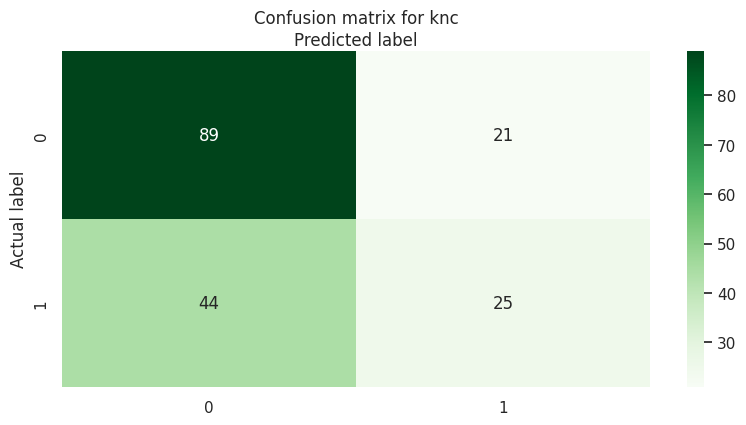

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

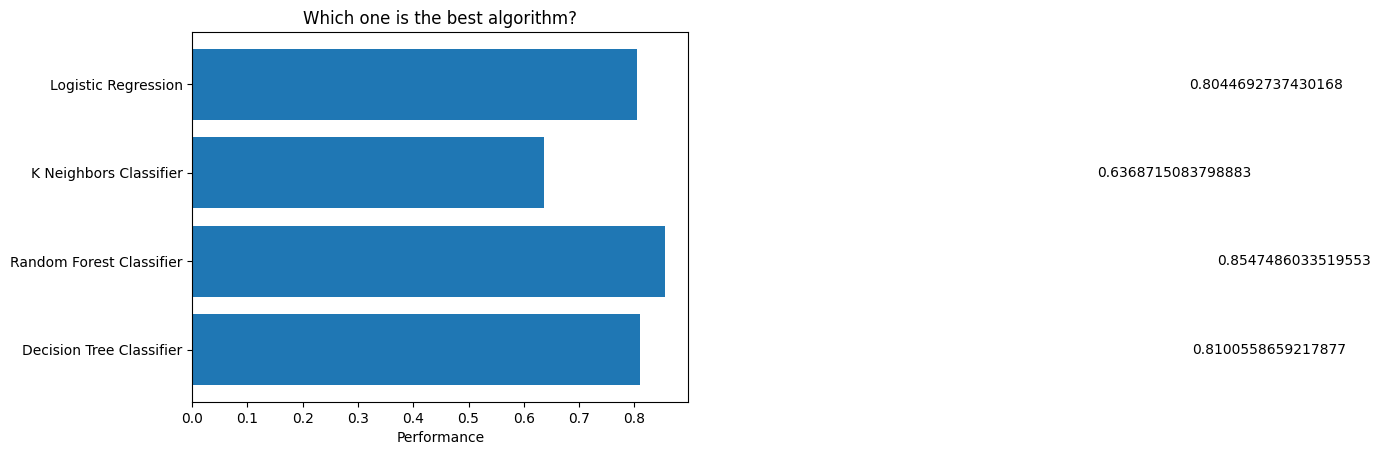

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [ ]:
score = score_logreg
output = out_logreg
print("Logistic Regression!", score)
if score_dtc > score:
    score = score_dtc
    output = out_dtc
    print("Decision Tree Classifier!", score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print("Random Forest Classifier!", score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print("K Neighbors Classifier!", score)

Logistic Regression! 0.8044692737430168
Decision Tree Classifier! 0.8100558659217877
Random Forest Classifier! 0.8547486033519553


## **AutoML**
Automated machine learning (AutoML) involves the complete automation of applying machine learning to real-world problems. H2O AutoML simplifies tasks like basic data processing, model training, optimization, and the integration of various models using Ensemble and stacking techniques. This method guarantees the development of high-performance models, enabling developers to focus on activities such as data collection, feature engineering, and model deployment. The subsequent section outlines the steps for configuring H2O.

### Installing necessary h2o libraries here

In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import logging
import psutil

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:43909..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnsi9aj10
  JVM stdout: /tmp/tmpnsi9aj10/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnsi9aj10/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:43909
Connecting to H2O server at http://127.0.0.1:43909 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_ys3xn2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/Titanic-Dataset.csv"
dataframe = h2o.import_file(path = url)
#converting target variable to categorical
dataframe['Survived'] = dataframe['Survived'].asfactor()
dataframe['Sex'] = dataframe['Sex'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dataframe.types

{'PassengerId': 'int',
 'Survived': 'enum',
 'Pclass': 'int',
 'Name': 'string',
 'Sex': 'enum',
 'Age': 'real',
 'SibSp': 'int',
 'Parch': 'int',
 'Ticket': 'int',
 'Fare': 'real',
 'Cabin': 'enum',
 'Embarked': 'enum'}

In [ ]:
X_test['Sex'] = X_test['Sex'].astype('category')

In [ ]:
dataframe.shape

(891, 12)

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
dataframe_train, dataframe_test = dataframe.split_frame([pct_rows])

In [ ]:
print(dataframe_train.shape)
print(dataframe_test.shape)

(730, 12)
(161, 12)


In [ ]:
#Display all columns in X
X=dataframe.columns
print(X)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
y_target = 'Survived'
X.remove(y_target)
print(X)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Run AutoML here

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
# Pass the data through H20AutoML
aml.train(x=X,y=y_target,training_frame=dataframe_train)

AutoML progress: |
23:10:19.899: _train param, Dropping bad and constant columns: [Name]

████
23:10:33.811: _train param, Dropping bad and constant columns: [Name]

██
23:10:38.932: _train param, Dropping bad and constant columns: [Name]

██
23:10:46.187: _train param, Dropping unused columns: [Name]
23:10:47.2: _train param, Dropping bad and constant columns: [Name]

██
23:10:52.952: _train param, Dropping bad and constant columns: [Name]

███
23:11:03.704: _train param, Dropping bad and constant columns: [Name]

█
23:11:08.454: _train param, Dropping bad and constant columns: [Name]

██
23:11:15.272: _train param, Dropping bad and constant columns: [Name]

█
23:11:19.200: _train param, Dropping unused columns: [Name]


23:11:20.223: _train param, Dropping unused columns: [Name]

█
23:11:21.26: _train param, Dropping bad and constant columns: [Name]

██
23:11:29.185: _train param, Dropping bad and constant columns: [Name]

██
23:11:35.671: _train param, Dropping bad and constant colu

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/42
# GBM base models (used / total),3/18
# XGBoost base models (used / total),2/17
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),2/4
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_3_AutoML_1_20231214_231019     0.874257   0.41273   0.850574                0.164134  0.355843  0.126625
StackedEnsemble_BestOfFamily_4_AutoML_1_20231214_231019  0.873505   0.41516   0.853607                0.16655   0.358383  0.128438
StackedEnsemble_AllModels_2_AutoML_1_20231214_231019     0.869643   0.42073   0.846459                0.17859   0.360258  0.129786
XGBoost_grid_1_AutoML_1_20231214_231019_model_8          0.868373   0.519255  0.842263                0.189051  0.376045  0.14141
StackedEnsemble_BestOfFamily_3_AutoML_1_20231214_231019  0.866445   0.424281  0.844714                0.176408  0.361478  0.130666
XGBoost_3_AutoML_1_20231214_231019                       0.864925   0.443325  0.83701                 0.177869  0.365052  0.133263
GBM_2_AutoML_1_20231214_231019                           0.86443    0.428297  0.8471

In [ ]:
# Assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'StackedEnsemble_AllModels_3_AutoML_1_20231214_231019': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20231214_231019': 1,
 'StackedEnsemble_AllModels_2_AutoML_1_20231214_231019': 2,
 'XGBoost_grid_1_AutoML_1_20231214_231019_model_8': 3,
 'GLM_1_AutoML_1_20231214_231019': 37}

In [ ]:
# Print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

3


In [ ]:
best_model1.algo

'xgboost'

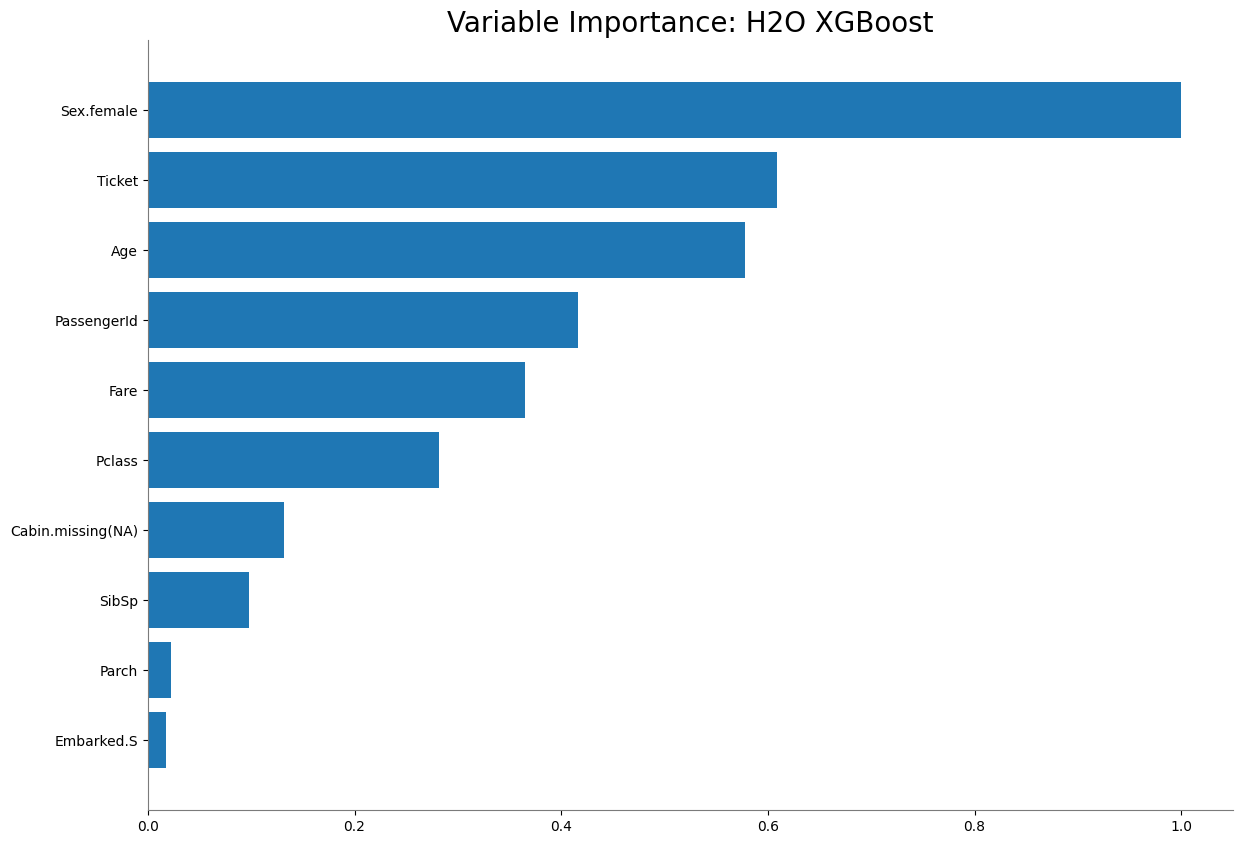

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot variables in order of their importance for survival prediction
if best_model1.algo in ['deeplearning','gbm','drf','xrt','xgboost', 'glm']:
    best_model1.varimp_plot()

### Model Interpretation with SHAP

**Intuition of Model Interpretation**:

*   Using SHAP to compute all the possible permutation at which the different features can be passed to the model
*   How we think about answering the question "Why is the output for this specific sample so low/high" manually?

In [ ]:
dataframe.types

{'PassengerId': 'int',
 'Survived': 'enum',
 'Pclass': 'int',
 'Name': 'string',
 'Sex': 'enum',
 'Age': 'real',
 'SibSp': 'int',
 'Parch': 'int',
 'Ticket': 'int',
 'Fare': 'real',
 'Cabin': 'enum',
 'Embarked': 'enum'}

In [ ]:
X_test['Sex'] = X_test['Sex'].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split
data_features = dataset[['PassengerId','Pclass','Age','Sex', 'SibSp', 'Parch','Fare','Embarked']]
# setting up a preprocessing pipeline using linear regression
X_train, X_test, y_train, y_test = train_test_split(data_features, dataset['Survived'], test_size=0.1, shuffle=False) #revert
#  define lists of categorical features based on the columns in X_train
catagorical_features = ['Sex','SibSp']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]

# set up lists (cat and num) of tuples where each tuple contains a feature and a list of transformers to be applied to that feature
# For categorical features, use SimpleImputer to fill missing values with 0 and OrdinalEncoder to encode them
# For numerical features, use SimpleImputer to fill missing values and StandardScaler to standardize the features

cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num= [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features if X_train[n].dtype in ['int64', 'float64']]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
# DataFrame with one row and columns corresponding to the union of the provided lists of categorical and numerical features
# All the cells in the DataFrame will contain NaN values
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,Sex,SibSp,PassengerId,Pclass,Age,Parch,Fare,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.224


In [ ]:
X_test.iloc[0: 1]

,PassengerId,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
801,802,2,31.0,1,1,1,26.25,0


In [ ]:
from collections import defaultdict

In [ ]:
sample_prediction = round(pipeline.predict(X_test.iloc[0: 1])[0], 3)
print(f"Current Prediction: {sample_prediction}, Actual value: {y_target[0]}")

Current Prediction: 0.723, Actual value: S


**How did we get from 0.449 to 1.205?**

* Find this by adjusting individual feature values. But this can be hard to look at
* Fast way to visualize is with Partial Dependency Plots (which uses Shap values for individual samples)
* Shap values assign a contributing factor to every feature of every sample

### Partial Dependence Plots



In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test.astype(float))

ExactExplainer explainer: 91it [00:10,  1.13it/s]


In [ ]:
X_test['Sex'] = X_test['Sex'].astype('category')

In [ ]:
#  partial dependence plots using the SHAP to help visualize the effect of a single feature on the model's predictions while holding other features constant
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

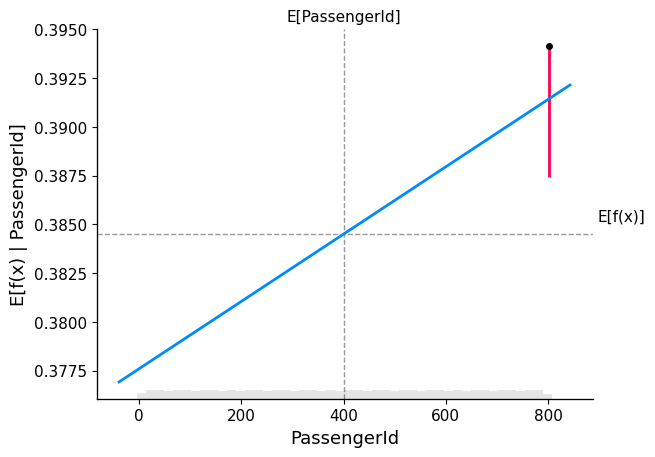

In [ ]:
partial_dependence_plot('PassengerId', 0)

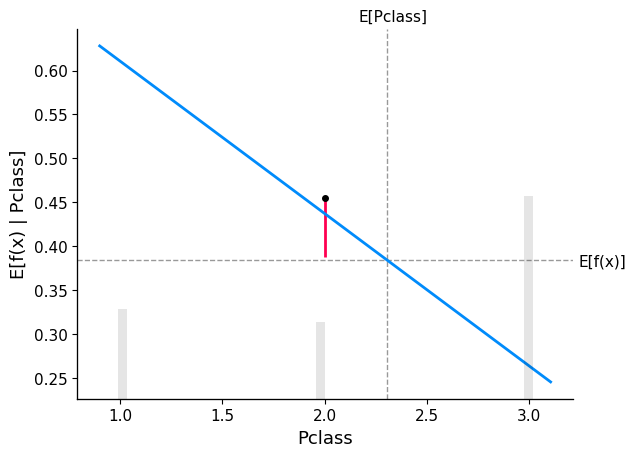

In [ ]:
partial_dependence_plot('Pclass', 0)

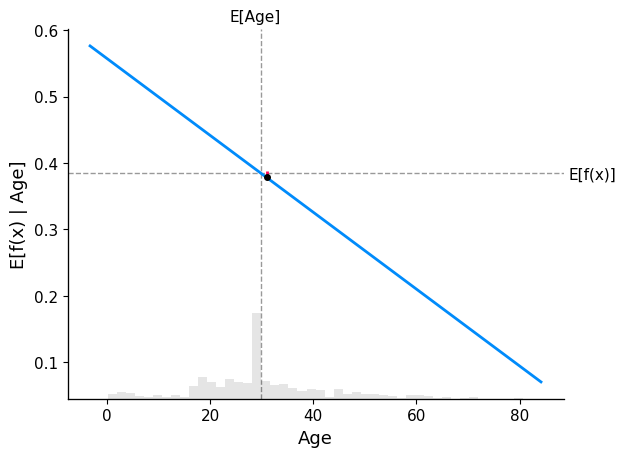

In [ ]:
partial_dependence_plot('Age', 0)

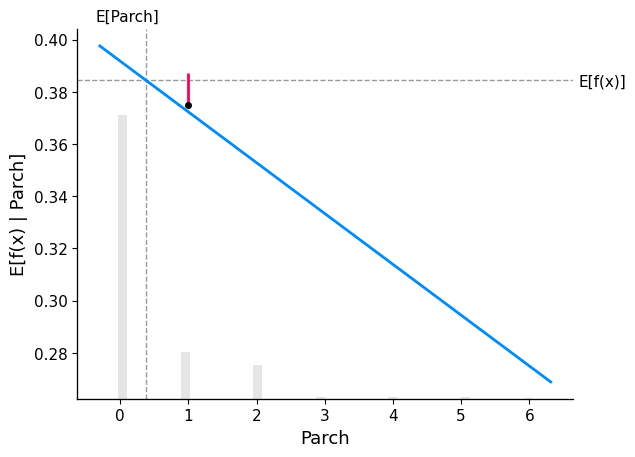

In [ ]:
partial_dependence_plot('Parch', 0)

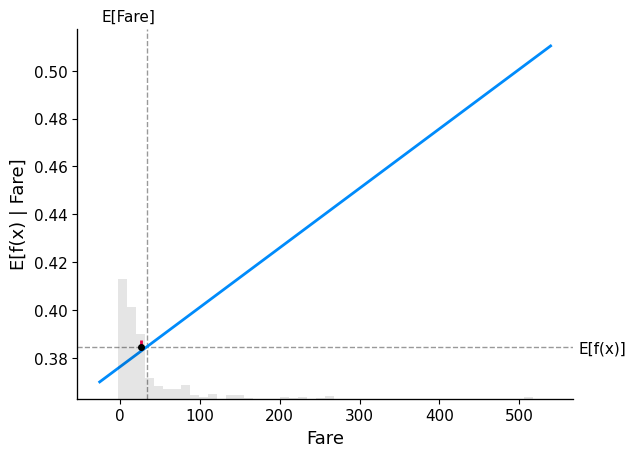

In [ ]:
partial_dependence_plot('Fare', 0)

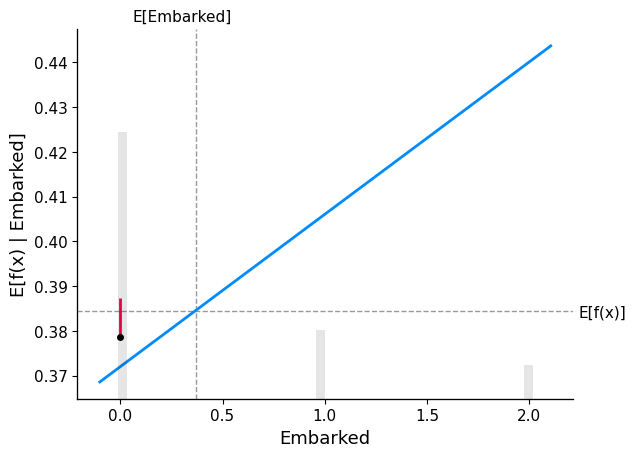

In [ ]:
partial_dependence_plot('Embarked', 0)

### Shap Plots
Hard to look at every feature for every sample. So lets look at all features of the same sample

In [ ]:
# initialize the JavaScript code needed to render the SHAP plots in notebook
shap.initjs()

In [ ]:
# generate SHAP visualizations for feature importance for a specific data sample identified by its index (idx)
# Condensed Force Plot (type='condensed'): Uses shap.plots.force to create a condensed force plot for the specified sample. Condensed force plots visually represent the impact of each feature on the model's prediction for a given instance.
# Waterfall Plot (type='waterfall'):Uses shap.plots.waterfall to generate a waterfall plot for the specified sample. Waterfall plots illustrate the step-by-step contribution of each feature to the final model prediction for an instance.
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

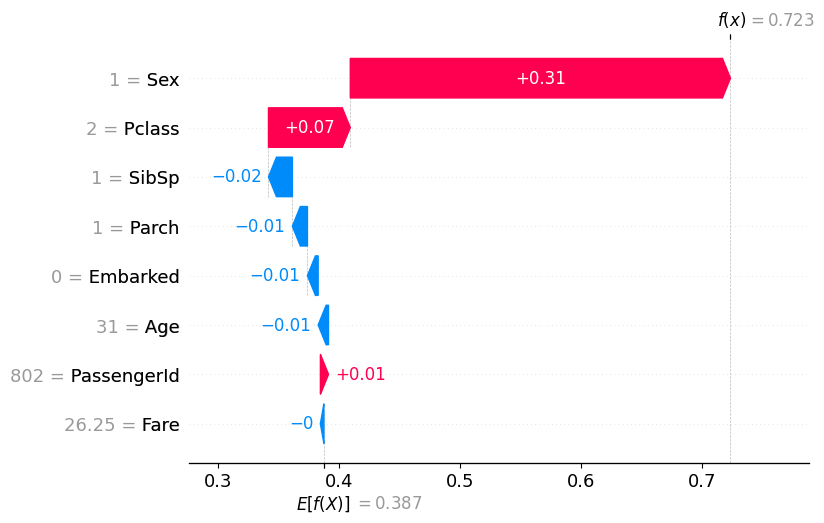

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
sample_feature_importance(0, 'condensed')

### Feature Importance for model
Looking at individual samples can be a bother. Let's look at all samples together

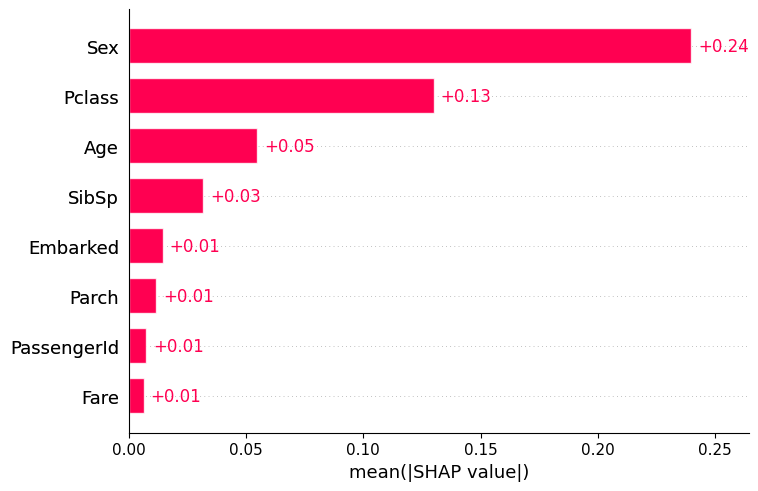

In [ ]:
# plot SHAP values to give a concise overview of the relative importance of different features in influencing the model's output
shap.plots.bar(shap_values)

Two most important features according to the LinearRegression model:

* Sex
* Pclass

A SHAP (SHapley Additive exPlanations) value of 0.1 for the "thal" feature in the model signifies that, on average, the presence of this feature contributes positively to the model's output, and its specific contribution is 0.1 units.

Here's a more detailed breakdown:

Positive Contribution (0.1): A positive SHAP value indicates that the existence of the feature has a positive impact on the model's output for the given instance. Essentially, the model's prediction for that instance is higher than the expected prediction (the mean prediction) due to the influence of this particular feature.

Magnitude (0.1): The magnitude of the SHAP value (0.1) reflects the strength of the contribution. In this instance, the contribution is moderately positive, influencing the model's output by 0.1 units.

Relative to Mean Prediction: SHAP values are typically interpreted in relation to the mean prediction. For example, a SHAP value of 0.1 implies that, on average, the presence of this feature leads to a prediction that is 0.1 units higher than the mean prediction.

Directionality: If the SHAP value were negative (-0.1), it would indicate a negative contribution, suggesting that the presence of the feature leads to a prediction 0.1 units lower than the mean prediction.

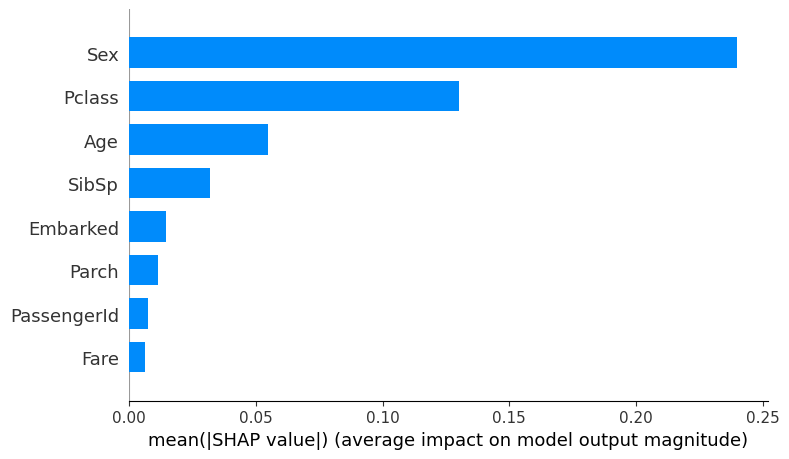

In [ ]:
# generate a summary bar plot of feature importance using SHAP values for the given shap_values and input dataset X_train.
# The resulting plot provides insights into which features have the most significant impact on the model's predictions.
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

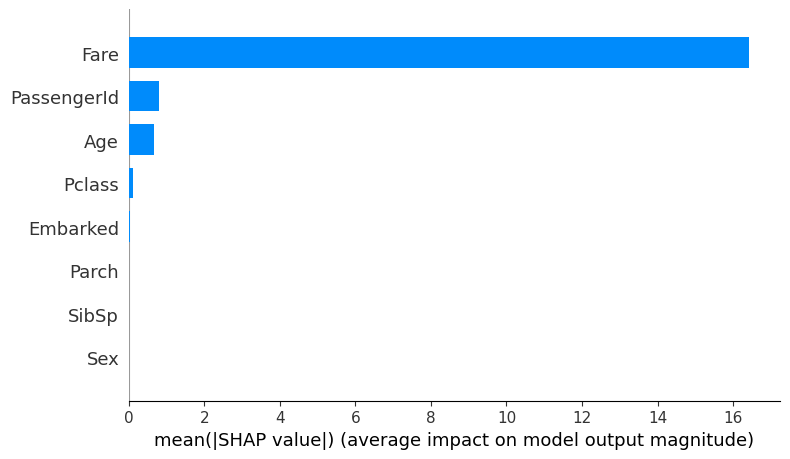

In [ ]:
explainer = shap.Explainer(reg, X_train.astype(float))
shap_values = explainer.shap_values(X_train.astype(float))
shap.summary_plot(shap_values, X_test, plot_type='bar')

**Fare is the most contributing factor**

***CONCLUSION***



I conducted a **SHAP analysis** on a linear regression model, breaking down the code into three main sections:



* **Creating a SHAP explainer object**: The initial step involves establishing a SHAP explainer object, accomplished by employing the LinearExplainer() function from the SHAP library. This object is configured with the linear regression model, lrmodel, and the input data, X.



* **Computing the SHAP values**: Subsequently, I calculated the SHAP values for the first ten instances in the dataset using the shap_values() function associated with the explainer object. These SHAP values constitute a matrix of feature importance scores, delineating the significance of each input feature for every instance.



* **Visualizing the SHAP values**: Lastly, I visualized the SHAP values utilizing the summary_plot() function from the SHAP library. This function generates a summary plot that illustrates the feature importance scores for each input feature pertaining to the chosen instances. The horizontal axis depicts the magnitude of the SHAP value, while the color signifies the value of the corresponding input feature.



* Finally, **the summary plot of SHAP values** for the entire testing set is visualized using shap.summary_plot(shap_values, X_test, plot_type=’bar’). This method generates a bar plot that shows the impact of each feature on the model’s predictions across all passengers in the testing set. The features are sorted in descending order of their importance, with the most important features at the top of the plot.

## LICENSE
MIT License

Copyright (c) 2023 Rakshita Jaiswal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### REFERENCES
* Dataset- https://www.kaggle.com/datasets/yasserh/titanic-dataset
* H20.ai- https://docs.h2o.ai/
* OLS Model- http://net-informations.com/ds/mla/ols.html
* Notebooks:
  https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb,
  https://www.kaggle.com/code/thunder7/h2o-auto-ml-titanic,
  https://towardsdatascience.com/using-model-interpretation-with-shap-to-understand-what-happened-in-the-titanic-1dd42ef41888
* Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML